# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [5]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [ ]:
env = UnityEnvironment(file_name='Reacher_one.exe')

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [3]:
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
torch.cuda.is_available()


True

In [ ]:
%load_ext autoreload
%autoreload 2
from ddpg_agent import Agent
def testFunction(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    agent = Agent(state_size=33, action_size=4, seed=0)
    epsilons = []
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0] 
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            # action = np.clip(action, -1, 1)
            env_info = env.step(action.astype(np.float32))[brain_name]  
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                    break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        epsilons.append(eps)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 10 == 0:
                print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)),end="")
                      
    print('\nEnvironment finished in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    #torch.save(agent.actor_local.state_dict(), actor_pth)
    #torch.save(agent.critic_local.state_dict(), critic_pth)
    return scores, epsilons

In [ ]:
eps_start = 1.0
eps_end=0.01
eps_decay=0.99
n_episodes = 200
max_t = 1000

scores, epsi = testFunction(n_episodes, max_t, eps_start, eps_end, eps_decay)

In [12]:
scores_1 = [0.47999998927116394, 1.8299999590963125, 0.0, 1.269999971613288, 3.36999992467463, 0.9999999776482582, 1.6599999628961086, 1.5999999642372131, 0.7799999825656414, 0.17999999597668648, 0.30999999307096004, 2.4299999456852674, 0.19999999552965164, 2.7399999387562275, 1.2499999720603228, 1.4499999675899744, 0.669999985024333, 2.7099999394267797, 1.8599999584257603, 1.2299999725073576, 0.8399999812245369, 1.4999999664723873, 11.18999974988401, 3.399999924004078, 1.9499999564141035, 5.489999877288938, 4.29999990388751, 3.1199999302625656, 3.5499999206513166, 1.0399999767541885, 5.129999885335565, 4.719999894499779, 1.6699999626725912, 4.229999905452132, 2.559999942779541, 4.29999990388751, 2.029999954625964, 5.329999880865216, 2.1599999517202377, 5.919999867677689, 3.589999919757247, 1.4299999680370092, 3.799999915063381, 3.109999930486083, 3.229999927803874, 1.81999995931983, 6.899999845772982, 5.999999865889549, 7.4299998339265585, 0.7599999830126762, 7.799999825656414, 12.989999709650874, 4.699999894946814, 9.419999789446592, 7.559999831020832, 11.149999750778079, 7.099999841302633, 8.729999804869294, 1.8599999584257603, 4.549999898299575, 9.209999794140458, 2.369999947026372, 5.199999883770943, 3.849999913945794, 9.549999786540866, 3.6299999188631773, 0.6299999859184027, 11.279999747872353, 9.909999778494239, 13.579999696463346, 6.379999857395887, 8.739999804645777, 21.79999951273203, 10.629999762400985, 1.149999974295497, 16.219999637454748, 5.859999869018793, 11.159999750554562, 2.5499999430030584, 9.709999782964587, 2.3999999463558197, 12.27999972552061, 12.149999728426337, 12.309999724850059, 4.279999904334545, 13.349999701604247, 10.469999765977263, 6.07999986410141, 4.359999902546406, 3.659999918192625, 14.799999669194221, 1.8099999595433474, 16.909999622032046, 0.3899999912828207, 12.269999725744128, 0.7099999841302633, 0.46999998949468136, 7.5499998312443495, 0.41999999061226845, 8.619999807327986, 3.279999926686287, 7.3099998366087675, 1.8699999582022429, 0.47999998927116394, 1.9099999573081732, 3.94999991171062, 14.229999681934714, 2.0699999537318945, 9.94999977760017, 11.88999973423779, 1.959999956190586, 1.2099999729543924, 3.0999999307096004, 7.579999830573797, 21.059999529272318, 3.63999991863966, 5.249999882653356, 1.8799999579787254, 6.479999855160713, 9.44999978877604, 7.249999837949872, 19.309999568387866, 11.119999751448631, 1.389999968931079, 11.409999744966626, 8.309999814257026, 11.179999750107527, 13.579999696463346, 15.909999644383788, 5.939999867230654, 11.939999733120203, 3.209999928250909, 19.759999558329582, 1.6799999624490738, 3.01999993249774, 21.009999530389905, 4.229999905452132, 10.56999976374209, 4.109999908134341, 17.61999960616231, 5.709999872371554, 0.4899999890476465, 14.71999967098236, 12.19999972730875, 8.499999810010195, 9.149999795481563, 3.179999928921461, 11.279999747872353, 17.77999960258603, 19.819999556988478, 9.189999794587493, 1.0099999774247408, 7.31999983638525, 15.929999643936753, 0.5699999872595072, 3.1699999291449785, 9.169999795034528, 19.379999566823244, 39.2699991222471, 1.7099999617785215, 8.399999812245369, 12.899999711662531, 0.8699999805539846, 8.659999806433916, 13.529999697580934, 17.80999960191548, 3.1399999298155308, 0.8299999814480543, 20.63999953866005, 13.139999706298113, 6.869999846443534, 22.34999950043857, 1.0199999772012234, 15.809999646618962, 17.789999602362514, 16.10999963991344, 8.339999813586473, 6.889999845996499, 7.719999827444553, 0.3799999915063381, 2.2799999490380287, 1.4199999682605267, 9.9899997767061, 4.289999904111028, 13.869999689981341, 8.609999807551503, 16.519999630749226, 16.03999964147806, 1.8699999582022429, 13.489999698475003, 2.3099999483674765, 28.449999364092946, 3.999999910593033, 2.9299999345093966, 0.4999999888241291, 24.889999443665147, 24.739999447017908, 2.059999953955412, 6.229999860748649, 27.37999938800931, 21.359999522566795, 18.43999958783388, 4.309999903663993, 0.7599999830126762, 7.729999827221036, 4.189999906346202, 26.859999399632215, 0.24999999441206455, 0.0, 0.25999999418854713, 18.559999585151672, 3.8199999146163464, 0.3199999928474426, 15.209999660030007, 3.1399999298155308, 6.319999858736992, 0.36999999172985554, 0.5199999883770943, 0.5199999883770943, 1.9199999570846558, 0.3899999912828207, 8.339999813586473, 14.999999664723873, 0.8299999814480543, 17.85999960079789, 17.279999613761902, 0.6199999861419201, 3.539999920874834, 1.9099999573081732, 3.1899999286979437, 0.3199999928474426, 1.029999976977706, 14.59999967366457, 16.10999963991344, 0.8899999801069498, 4.029999909922481, 1.029999976977706, 22.219999503344297, 0.6599999852478504, 0.9199999794363976, 21.25999952480197, 21.199999526143074, 19.079999573528767, 16.669999627396464, 4.679999895393848, 16.8799996227026, 19.999999552965164, 6.319999858736992, 1.0599999763071537, 31.049999305978417, 9.13999979570508, 23.89999946579337, 6.459999855607748, 8.189999816939235, 14.009999686852098, 29.799999333918095, 7.919999822974205, 9.399999789893627, 24.3999994546175, 23.089999483898282, 26.68999940343201, 15.109999662265182, 0.7799999825656414, 0.5299999881535769, 5.789999870583415, 7.679999828338623, 14.94999966584146, 0.5199999883770943, 10.95999975502491, 1.389999968931079, 8.259999815374613, 2.5899999421089888, 15.129999661818147, 15.309999657794833, 3.759999915957451, 13.35999970138073, 37.84999915398657, 1.4299999680370092, 25.889999421313405, 0.5999999865889549, 17.18999961577356, 0.19999999552965164, 16.26999963633716, 10.519999764859676, 21.549999518319964, 3.1699999291449785, 29.069999350234866, 16.56999962963164, 3.8399999141693115, 0.5999999865889549, 0.2199999950826168, 0.11999999731779099, 0.40999999083578587, 0.8699999805539846, 18.929999576881528, 2.5899999421089888, 4.779999893158674, 11.3099997472018, 0.789999982342124, 0.6399999856948853, 13.769999692216516, 6.599999852478504, 0.17999999597668648, 3.3799999244511127, 14.049999685958028, 10.639999762177467, 17.109999617561698, 1.6299999635666609, 19.229999570176005, 8.999999798834324, 0.7699999827891588, 13.589999696239829, 17.15999961644411, 0.18999999575316906, 2.3299999479204416, 4.4399999007582664, 15.709999648854136, 0.8799999803304672, 25.689999425783753, 0.7099999841302633, 20.44999954290688, 7.019999843090773, 1.2799999713897705, 16.629999628290534, 1.0899999756366014, 1.4399999678134918, 7.689999828115106, 0.7799999825656414, 13.539999697357416, 24.609999449923635, 0.24999999441206455, 0.14999999664723873, 19.9799995534122, 0.4599999897181988, 7.019999843090773, 17.519999608397484, 3.7399999164044857, 21.95999950915575, 18.269999591633677, 1.699999962002039, 13.919999688863754, 0.0, 0.42999999038875103, 21.019999530166388, 10.129999773576856, 0.2699999939650297, 3.9599999114871025, 0.1599999964237213, 6.7599998489022255, 0.9999999776482582, 2.659999940544367, 6.139999862760305, 8.449999811127782, 9.329999791458249, 0.019999999552965164, 6.419999856501818, 0.0, 10.059999775141478, 0.5099999886006117, 2.7599999383091927, 11.699999738484621, 12.989999709650874, 1.7299999613314867, 3.779999915510416, 10.059999775141478, 9.029999798163772, 16.709999626502395, 0.3399999924004078, 6.859999846667051, 17.38999961130321, 5.379999879747629, 7.529999831691384, 8.28999981470406, 0.4999999888241291, 10.059999775141478, 11.789999736472964, 17.529999608173966, 0.3399999924004078, 0.3799999915063381, 10.709999760612845, 1.0899999756366014, 12.789999714121222, 0.5799999870359898, 7.469999833032489, 10.829999757930636, 11.029999753460288, 2.109999952837825, 13.729999693110585, 0.9499999787658453, 9.759999781847, 10.72999976016581, 2.6899999398738146, 0.6599999852478504, 14.419999677687883, 13.839999690651894, 2.0699999537318945, 0.8999999798834324, 3.01999993249774, 0.7699999827891588, 20.389999544247985, 12.249999726191163, 12.959999710321426, 14.899999666959047, 3.5999999195337296, 2.339999947696924, 0.7799999825656414, 15.379999656230211, 19.819999556988478, 1.8999999575316906, 13.97999968752265, 0.5099999886006117, 14.739999670535326, 11.939999733120203, 3.7899999152868986, 0.6899999845772982, 0.7999999821186066, 11.209999749436975, 12.729999715462327, 3.36999992467463, 4.859999891370535, 14.82999966852367, 0.9199999794363976, 16.019999641925097, 1.2799999713897705, 8.299999814480543, 11.26999974809587, 8.269999815151095, 16.91999962180853, 0.9999999776482582, 0.7599999830126762, 14.169999683275819, 0.8199999816715717, 0.7699999827891588, 14.199999682605267, 0.4899999890476465, 0.2799999937415123, 1.2799999713897705, 13.39999970048666, 23.409999476745725, 18.16999959386885, 5.469999877735972, 0.7399999834597111, 16.88999962247908, 19.59999956190586, 1.1299999747425318, 17.07999961823225, 14.149999683722854, 0.35999999195337296, 14.82999966852367, 13.239999704062939, 0.7099999841302633, 15.349999656900764, 16.72999962605536, 0.7599999830126762, 9.739999782294035, 13.199999704957008, 1.2799999713897705, 0.7199999839067459, 0.04999999888241291, 19.409999566152692, 24.719999447464943, 0.7499999832361937, 16.969999620690942, 0.23999999463558197, 2.1199999526143074, 10.969999754801393, 16.99999962002039, 8.339999813586473, 0.6599999852478504, 20.399999544024467, 23.31999947875738, 13.3199997022748, 13.119999706745148, 19.339999567717314, 0.29999999329447746, 17.909999599680305, 3.9299999121576548, 15.019999664276838, 0.8199999816715717, 19.469999564811587, 0.6099999863654375, 1.1199999749660492, 1.3699999693781137, 16.72999962605536, 17.669999605044723, 17.289999613538384, 0.0, 1.5899999644607306, 5.009999888017774, 11.959999732673168, 3.2199999280273914, 9.969999777153134, 14.299999680370092, 2.249999949708581, 17.299999613314867, 8.78999980352819, 18.38999958895147, 13.409999700263143, 0.6299999859184027, 2.079999953508377, 0.6599999852478504, 0.5599999874830246, 0.7999999821186066, 20.71999953687191, 17.219999615103006, 0.6999999843537807, 3.5499999206513166, 2.7699999380856752, 39.30999912135303, 1.289999971166253, 2.4999999441206455, 8.359999813139439, 1.2999999709427357, 24.309999456629157, 17.479999609291553, 7.89999982342124, 4.689999895170331, 12.169999727979302, 1.7099999617785215, 8.349999813362956, 11.739999737590551, 10.249999770894647, 6.719999849796295, 4.3899999018758535, 14.6399996727705, 8.16999981738627, 12.569999719038606, 9.13999979570508, 12.769999714568257, 0.3799999915063381, 5.80999987013638, 11.059999752789736, 0.6299999859184027, 8.179999817162752, 0.6399999856948853, 13.66999969445169, 10.349999768659472, 0.6399999856948853, 8.099999818950891, 10.849999757483602, 8.55999980866909, 0.2799999937415123, 4.699999894946814, 0.23999999463558197, 27.41999938711524, 8.399999812245369, 0.669999985024333, 19.969999553635716, 10.989999754354358, 1.4799999669194221, 9.13999979570508, 18.829999579116702, 0.36999999172985554, 7.399999834597111, 3.539999920874834, 0.3299999926239252, 8.90999980084598, 20.659999538213015, 1.389999968931079, 23.129999483004212, 0.8199999816715717, 19.489999564364552, 1.839999958872795, 0.9999999776482582, 0.9199999794363976, 17.179999615997076, 1.5899999644607306, 2.9299999345093966, 12.50999972037971, 0.7699999827891588, 2.5999999418854713, 15.549999652430415, 20.90999953262508, 3.4999999217689037, 11.139999751001596, 15.48999965377152, 0.6799999848008156, 18.529999585822225, 15.91999964416027, 5.359999880194664, 1.0499999765306711, 12.899999711662531, 8.949999799951911, 2.5299999434500933, 16.909999622032046, 16.65999962761998, 0.7599999830126762, 16.799999624490738, 4.679999895393848, 1.0499999765306711, 3.399999924004078, 30.579999316483736, 0.6399999856948853, 11.629999740049243, 13.899999689310789, 1.0899999756366014, 11.319999746978283, 15.29999965801835, 13.93999968841672, 17.299999613314867, 21.48999951966107, 17.099999617785215, 12.439999721944332, 1.149999974295497, 0.669999985024333, 11.919999733567238, 0.549999987706542, 6.34999985806644, 0.7199999839067459, 15.939999643713236, 38.38999914191663, 22.11999950557947, 0.6199999861419201, 15.559999652206898, 0.8299999814480543, 9.579999785870314, 7.729999827221036, 13.259999703615904, 7.179999839514494, 11.419999744743109, 0.4899999890476465, 0.12999999709427357, 21.859999511390924, 19.389999566599727, 0.35999999195337296, 13.889999689534307, 17.80999960191548, 19.339999567717314, 0.7799999825656414, 18.62999958358705, 7.919999822974205, 19.229999570176005, 23.839999467134476, 10.249999770894647, 0.20999999530613422, 1.6699999626725912, 23.259999480098486, 19.819999556988478, 24.89999944344163, 0.3899999912828207, 0.6099999863654375, 20.109999550506473, 20.67999953776598, 20.479999542236328, 21.679999515414238, 0.5399999879300594, 12.099999729543924, 15.389999656006694, 14.8699996676296, 18.43999958783388, 20.789999535307288, 19.419999565929174, 0.6899999845772982, 5.899999868124723, 0.41999999061226845, 23.059999484568834, 0.7999999821186066, 1.2399999722838402, 1.5199999660253525, 0.6799999848008156, 24.20999945886433, 27.18999939225614, 0.789999982342124, 0.2299999948590994, 22.559999495744705, 1.7399999611079693, 9.579999785870314, 7.839999824762344, 14.189999682828784, 2.2799999490380287, 0.30999999307096004, 0.8699999805539846, 12.999999709427357, 25.16999943740666, 25.189999436959624, 21.049999529495835, 7.1199998408555984, 4.489999899640679, 7.849999824538827, 25.32999943383038, 18.029999596998096, 10.64999976195395, 3.0999999307096004, 0.3999999910593033, 0.11999999731779099, 0.4999999888241291, 6.829999847337604, 13.099999707192183, 7.289999837055802, 1.3699999693781137, 1.4999999664723873, 7.5499998312443495, 12.709999715909362, 12.659999717026949, 3.94999991171062, 6.839999847114086, 7.339999835938215, 11.359999746084213, 7.27999983727932, 8.039999820291996, 2.539999943226576, 3.779999915510416, 3.999999910593033, 0.6199999861419201, 1.7999999597668648, 13.16999970562756, 0.7699999827891588, 4.29999990388751, 1.1099999751895666, 9.859999779611826, 9.829999780282378, 0.6199999861419201, 1.3199999704957008, 3.7499999161809683, 0.3999999910593033, 0.5299999881535769, 3.4999999217689037, 6.269999859854579, 8.309999814257026, 11.519999742507935, 1.3299999702721834, 9.94999977760017, 1.7599999606609344, 16.29999963566661, 15.829999646171927, 3.4399999231100082, 1.0499999765306711, 0.30999999307096004, 7.919999822974205, 0.36999999172985554, 0.5199999883770943, 3.94999991171062, 8.539999809116125, 2.0399999544024467, 10.629999762400985, 3.159999929368496, 10.789999758824706, 2.9599999338388443, 7.6199998296797276, 0.4399999901652336, 3.05999993160367, 1.2099999729543924, 15.48999965377152, 5.14999988488853, 0.4999999888241291, 12.979999709874392, 11.359999746084213, 0.5699999872595072, 0.5899999868124723, 14.82999966852367, 3.3899999242275953, 0.8099999818950891, 20.349999545142055, 1.0399999767541885, 6.5199998542666435, 11.84999973513186, 4.709999894723296, 13.599999696016312, 10.369999768212438, 0.8199999816715717, 0.6099999863654375, 0.35999999195337296, 0.7599999830126762, 3.7399999164044857, 3.299999926239252, 0.3399999924004078, 9.829999780282378, 5.589999875053763, 7.379999835044146, 15.289999658241868, 0.11999999731779099, 0.5399999879300594, 0.2899999935179949, 0.0, 6.409999856725335, 6.9999998435378075, 2.5999999418854713, 6.719999849796295, 9.44999978877604, 9.129999795928597, 3.8199999146163464, 1.5899999644607306, 9.149999795481563, 0.5599999874830246, 8.109999818727374, 6.5199998542666435, 11.109999751672149, 3.569999920204282, 1.2099999729543924, 1.4199999682605267, 5.8499998692423105, 0.3899999912828207, 0.4399999901652336, 0.20999999530613422, 8.139999818056822, 7.449999833479524, 14.779999669641256, 0.6099999863654375, 0.6899999845772982, 1.7099999617785215, 0.3899999912828207, 0.5799999870359898, 0.29999999329447746, 1.4399999678134918, 1.1299999747425318, 24.059999462217093, 4.909999890252948, 0.3499999921768904, 1.1199999749660492, 6.689999850466847, 8.269999815151095, 7.93999982252717, 1.0599999763071537, 0.9199999794363976, 3.659999918192625, 1.029999976977706, 0.11999999731779099, 0.8599999807775021, 0.0, 0.8099999818950891, 0.8199999816715717, 11.369999745860696, 6.599999852478504, 3.039999932050705, 2.2899999488145113, 6.139999862760305, 4.669999895617366, 3.969999911263585, 2.1399999521672726, 6.549999853596091, 0.4399999901652336, 1.7099999617785215, 0.7299999836832285, 1.0099999774247408, 8.049999820068479, 4.169999906793237, 0.5599999874830246, 4.1999999061226845, 2.0999999530613422, 7.749999826774001, 3.129999930039048, 0.14999999664723873, 4.369999902322888, 6.3999998569488525, 0.6199999861419201, 1.9099999573081732, 1.6399999633431435, 5.039999887347221, 2.869999935850501, 0.9299999792128801, 4.799999892711639, 4.889999890699983, 4.039999909698963, 0.30999999307096004, 5.649999873712659, 1.959999956190586, 3.659999918192625, 3.2699999269098043, 4.709999894723296, 5.039999887347221, 9.159999795258045, 0.4999999888241291, 7.649999829009175, 4.459999900311232, 0.7499999832361937, 1.1299999747425318, 4.449999900534749, 0.8099999818950891, 1.8099999595433474, 1.3999999687075615, 1.3099999707192183, 2.7099999394267797, 3.5599999204277992, 4.2699999045580626, 3.1399999298155308, 2.919999934732914, 0.4499999899417162, 0.4999999888241291, 1.029999976977706, 3.6299999188631773, 1.529999965801835, 2.2199999503791332, 12.419999722391367, 11.399999745190144, 0.7399999834597111, 9.79999978095293, 5.589999875053763, 7.729999827221036, 2.8799999356269836, 6.959999844431877, 9.209999794140458, 1.0199999772012234, 2.3999999463558197, 0.12999999709427357, 1.099999975413084, 6.789999848231673, 10.429999766871333, 4.129999907687306, 0.3199999928474426, 6.069999864324927, 0.7399999834597111, 4.189999906346202, 0.11999999731779099, 0.4599999897181988, 4.499999899417162, 1.0099999774247408, 4.579999897629023, 0.8999999798834324, 0.25999999418854713, 9.919999778270721, 3.759999915957451, 5.49999987706542, 0.3399999924004078, 6.109999863430858, 10.749999759718776, 1.81999995931983, 10.33999976888299, 0.1699999962002039, 12.23999972641468, 1.0199999772012234, 1.0599999763071537, 6.379999857395887, 2.43999994546175, 6.009999865666032, 12.419999722391367, 6.0899998638778925, 3.249999927356839, 14.279999680817127, 5.549999875947833, 2.2799999490380287, 0.4399999901652336, 8.729999804869294, 3.5299999210983515, 10.91999975591898, 10.229999771341681, 0.8199999816715717, 5.169999884441495, 3.4399999231100082, 0.9499999787658453, 1.9899999555200338, 1.169999973848462, 0.9899999778717756, 6.359999857842922, 9.709999782964587, 0.6499999854713678, 1.0499999765306711, 0.2299999948590994, 4.129999907687306, 1.5599999651312828, 5.169999884441495, 1.8599999584257603, 5.389999879524112, 7.519999831914902, 3.3099999260157347, 10.849999757483602, 1.9299999568611383, 14.259999681264162, 0.7099999841302633, 0.4399999901652336, 9.709999782964587, 0.24999999441206455, 6.139999862760305, 3.039999932050705, 0.04999999888241291, 0.9699999783188105, 0.789999982342124, 11.329999746754766, 8.499999810010195, 5.5399998761713505, 0.14999999664723873, 1.769999960437417, 7.699999827891588, 6.289999859407544, 9.749999782070518, 9.279999792575836, 0.5299999881535769, 0.3799999915063381, 16.209999637678266, 0.5199999883770943, 5.579999875277281, 8.959999799728394, 7.249999837949872, 0.2199999950826168, 1.1399999745190144, 0.6799999848008156, 2.179999951273203, 1.8799999579787254, 1.1299999747425318, 6.269999859854579, 13.519999697804451, 6.299999859184027, 0.11999999731779099, 7.409999834373593, 7.909999823197722, 1.1799999736249447, 13.279999703168869, 6.439999856054783, 10.389999767765403, 14.959999665617943, 9.769999781623483]


In [14]:
scores = [0.6299999859184027, 0.3399999924004078, 0.8899999801069498, 0.47999998927116394, 0.3999999910593033, 0.2699999939650297, 1.029999976977706, 0.7299999836832285, 0.6199999861419201, 0.909999979659915, 1.1399999745190144, 0.669999985024333, 0.0, 0.979999978095293, 0.7199999839067459, 0.3299999926239252, 1.269999971613288, 1.099999975413084, 1.2999999709427357, 1.6599999628961086, 0.3899999912828207, 1.5699999649077654, 3.089999930933118, 1.4899999666959047, 1.4799999669194221, 1.339999970048666, 1.2999999709427357, 2.0899999532848597, 1.7599999606609344, 2.729999938979745, 2.1699999514967203, 2.8599999360740185, 2.179999951273203, 4.129999907687306, 1.1799999736249447, 2.7399999387562275, 2.9299999345093966, 4.899999890476465, 3.1499999295920134, 3.6499999184161425, 1.8799999579787254, 3.3399999253451824, 1.7999999597668648, 4.429999900981784, 1.8699999582022429, 3.5499999206513166, 4.3199999034404755, 7.289999837055802, 7.369999835267663, 13.509999698027968, 6.269999859854579, 10.37999976798892, 7.149999840185046, 5.019999887794256, 7.329999836161733, 5.529999876394868, 9.339999791234732, 9.379999790340662, 3.9599999114871025, 9.13999979570508, 10.829999757930636, 8.279999814927578, 11.389999745413661, 8.149999817833304, 15.409999655559659, 13.559999696910381, 10.489999765530229, 15.119999662041664, 23.369999477639794, 20.089999550953507, 19.0599995739758, 14.6399996727705, 21.87999951094389, 14.029999686405063, 23.839999467134476, 16.289999635890126, 27.089999394491315, 11.669999739155173, 32.78999926708639, 12.669999716803432, 25.4899994302541, 14.129999684169888, 22.939999487251043, 24.179999459534883, 15.039999663829803, 15.909999644383788, 17.069999618455768, 10.949999755248427, 39.61999911442399, 28.88999935425818, 27.84999937750399, 26.749999402090907, 30.119999326765537, 9.539999786764383, 25.499999430030584, 27.709999380633235, 14.129999684169888, 32.009999284520745, 25.43999943137169, 25.78999942354858, 32.30999927781522, 28.879999354481697, 12.659999717026949, 25.459999430924654, 27.4999993853271, 29.93999933078885, 26.659999404102564, 13.659999694675207, 22.369999499991536, 28.899999354034662, 33.329999255016446, 26.79999940097332, 27.99999937415123, 26.969999397173524, 30.499999318271875, 11.219999749213457, 28.42999936453998, 18.269999591633677, 32.57999927178025, 25.229999436065555, 22.319999501109123, 39.50999911688268, 13.229999704286456, 15.509999653324485, 16.049999641254544, 34.8499992210418, 32.21999927982688, 37.66999915800989, 23.54999947361648, 10.369999768212438, 24.029999462887645, 10.68999976105988, 35.50999920628965, 23.69999947026372, 29.42999934218824, 33.599999248981476, 32.92999926395714, 34.00999923981726, 31.40999929793179, 32.75999926775694, 25.049999440088868, 14.6399996727705, 36.83999917656183, 15.189999660477042, 12.149999728426337, 23.769999468699098, 21.589999517425895, 26.389999410137534, 22.709999492391944, 29.179999347776175, 10.719999760389328, 30.739999312907457, 22.639999493956566, 13.179999705404043, 11.459999743849039, 3.6499999184161425, 11.129999751225114, 18.409999588504434, 34.259999234229326, 20.089999550953507, 23.489999474957585, 8.159999817609787, 13.929999688640237, 18.179999593645334, 26.119999416172504, 10.369999768212438, 2.5499999430030584, 26.869999399408698, 11.509999742731452, 19.389999566599727, 17.749999603256583, 25.049999440088868, 26.579999405890703, 9.669999783858657, 21.14999952726066, 7.129999840632081, 14.309999680146575, 7.349999835714698, 8.579999808222055, 11.569999741390347, 29.919999331235886, 25.969999419525266, 7.89999982342124, 12.309999724850059, 10.219999771565199, 14.859999667853117, 8.539999809116125, 26.56999940611422, 25.0899994391948, 21.829999512061477, 24.069999461993575, 13.599999696016312, 24.609999449923635, 18.81999957934022, 25.079999439418316, 25.9499994199723, 18.769999580457807, 6.11999986320734, 15.809999646618962, 10.049999775364995, 20.889999533072114, 20.71999953687191, 3.3199999257922173, 27.91999937593937, 23.46999947540462, 19.959999553859234, 18.08999959565699, 7.159999839961529, 9.459999788552523, 8.639999806880951, 24.499999452382326, 11.76999973692, 4.6299998965114355, 20.36999954469502, 5.309999881312251, 16.059999641031027, 16.61999962851405, 3.3799999244511127, 9.979999776929617, 18.189999593421817, 28.07999937236309, 17.789999602362514, 10.429999766871333, 2.1199999526143074, 4.229999905452132, 11.839999735355377, 18.889999577775598, 1.459999967366457, 29.07999935001135, 1.1899999734014273, 13.959999687969685, 28.589999360963702, 22.989999486133456, 18.459999587386847, 25.01999944075942, 25.939999420195818, 18.349999589845538, 24.6299994494766, 6.629999851807952, 26.899999398738146, 22.72999949194491, 7.169999839738011, 7.759999826550484, 8.609999807551503, 22.02999950759113, 7.989999821409583, 25.9499994199723, 21.089999528601766, 10.789999758824706, 35.28999921120703, 22.41999949887395, 21.529999518767, 3.2399999275803566, 25.429999431595206, 32.359999276697636, 27.739999379962683, 9.579999785870314, 30.539999317377806, 19.499999564141035, 25.09999943897128, 15.669999649748206, 10.059999775141478, 8.309999814257026, 8.459999810904264, 25.779999423772097, 25.549999428912997, 20.669999537989497, 4.139999907463789, 12.8599997125566, 18.829999579116702, 3.039999932050705, 19.159999571740627, 18.219999592751265, 14.399999678134918, 4.979999888688326, 4.21999990567565, 26.229999413713813, 7.369999835267663, 14.889999667182565, 6.3999998569488525, 21.699999514967203, 5.599999874830246, 21.41999952122569, 24.119999460875988, 23.169999482110143, 2.5999999418854713, 20.67999953776598, 7.079999841749668, 5.439999878406525, 2.1699999514967203, 15.789999647065997, 3.039999932050705, 21.659999515861273, 24.889999443665147, 24.78999944590032, 24.189999459311366, 6.819999847561121, 3.9099999126046896, 18.459999587386847, 28.019999373704195, 24.769999446347356, 3.8899999130517244, 27.30999938957393, 25.839999422430992, 2.799999937415123, 3.0299999322742224, 10.45999976620078, 2.74999993853271, 21.669999515637755, 7.709999827668071, 29.299999345093966, 5.579999875277281, 30.05999932810664, 21.859999511390924, 3.6199999190866947, 27.88999937660992, 8.229999816045165, 15.089999662712216, 13.959999687969685, 10.249999770894647, 8.74999980442226, 28.369999365881085, 16.469999631866813, 11.829999735578895, 8.799999803304672, 16.639999628067017, 9.659999784082174, 1.8799999579787254, 3.089999930933118, 29.70999933592975, 28.73999935761094, 1.1999999731779099, 10.449999766424298, 20.399999544024467, 18.39999958872795, 1.3099999707192183, 29.909999331459403, 24.769999446347356, 8.719999805092812, 5.5399998761713505, 22.749999491497874, 3.7499999161809683, 2.0999999530613422, 9.5299997869879, 4.52999989874661, 1.3999999687075615, 2.4499999452382326, 18.659999582916498, 19.00999957509339, 0.6499999854713678, 13.649999694898725, 10.139999773353338, 4.059999909251928, 1.6799999624490738, 1.0499999765306711, 16.099999640136957, 18.929999576881528, 4.849999891594052, 13.869999689981341, 4.21999990567565, 0.8699999805539846, 2.8599999360740185, 8.929999800398946, 6.439999856054783, 4.069999909028411, 5.889999868348241, 1.4199999682605267, 7.949999822303653, 0.7599999830126762, 19.90999955497682, 21.049999529495835, 3.0499999318271875, 24.109999461099505, 15.199999660253525, 15.389999656006694, 2.2399999499320984, 27.709999380633235, 5.209999883547425, 7.509999832138419, 18.209999592974782, 25.919999420642853, 14.239999681711197, 8.979999799281359, 1.1799999736249447, 22.239999502897263, 2.629999941214919, 38.439999140799046, 2.419999945908785, 27.319999389350414, 1.3199999704957008, 5.959999866783619, 30.47999931871891, 29.12999934889376, 13.459999699145555, 5.209999883547425, 21.33999952301383, 9.36999979056418, 22.299999501556158, 17.689999604597688, 3.5599999204277992, 6.889999845996499, 18.309999590739608, 26.939999397844076, 31.87999928742647, 25.259999435395002, 20.469999542459846, 22.64999949373305, 9.519999787211418, 27.949999375268817, 26.889999398961663, 30.819999311119318, 7.35999983549118, 22.439999498426914, 31.299999300390482, 26.60999940522015, 23.479999475181103, 6.869999846443534, 35.92999919690192, 23.19999948143959, 39.04999912716448, 13.369999701157212, 18.489999586716294, 10.439999766647816, 11.18999974988401, 1.169999973848462, 13.959999687969685, 1.0599999763071537, 21.039999529719353, 19.999999552965164, 20.159999549388885, 19.499999564141035, 19.069999573752284, 21.659999515861273, 21.129999527707696, 21.21999952569604, 25.569999428465962, 19.099999573081732, 16.669999627396464, 22.939999487251043, 3.7199999168515205, 0.2799999937415123, 15.549999652430415, 14.849999668076634, 0.8299999814480543, 18.949999576434493, 23.57999947294593, 26.869999399408698, 19.499999564141035, 0.5099999886006117, 2.319999948143959, 23.3099994789809, 3.469999922439456, 4.0799999088048935, 18.07999959588051, 4.159999907016754, 31.21999930217862, 25.12999943830073, 16.8799996227026, 19.00999957509339, 11.3099997472018, 13.859999690204859, 11.059999752789736, 25.05999943986535, 17.489999609068036, 17.65999960526824, 16.009999642148614, 15.83999964594841, 9.329999791458249, 10.389999767765403, 11.179999750107527, 8.379999812692404, 4.369999902322888, 21.849999511614442, 0.6899999845772982, 11.529999742284417, 4.0799999088048935, 0.9599999785423279, 18.219999592751265, 24.489999452605844, 17.089999618008733, 21.099999528378248, 2.659999940544367, 23.749999469146132, 21.529999518767, 17.709999604150653, 13.039999708533287, 17.23999961465597, 15.959999643266201, 10.229999771341681, 10.699999760836363, 0.6799999848008156, 17.509999608621, 1.5699999649077654, 11.739999737590551, 8.949999799951911, 22.65999949350953, 7.529999831691384, 4.019999910145998, 23.829999467357993, 0.9699999783188105, 25.63999942690134, 25.09999943897128, 28.46999936364591, 1.529999965801835, 11.279999747872353, 0.7599999830126762, 12.50999972037971, 16.03999964147806, 24.289999457076192, 14.98999966494739, 0.46999998949468136, 14.489999676123261, 10.219999771565199, 16.829999623820186, 8.12999981828034, 18.1999995931983, 28.569999361410737, 0.9499999787658453, 10.189999772235751, 0.19999999552965164, 15.599999651312828, 25.509999429807067, 0.4899999890476465, 22.02999950759113, 0.5299999881535769, 9.919999778270721, 20.999999530613422, 14.159999683499336, 16.45999963209033, 12.959999710321426, 20.749999536201358, 26.29999941214919, 13.239999704062939, 6.11999986320734, 38.169999146834016, 2.5299999434500933, 21.209999525919557, 12.709999715909362, 0.6599999852478504, 22.909999487921596, 4.109999908134341, 21.21999952569604, 19.459999565035105, 15.619999650865793, 24.139999460428953, 0.5599999874830246, 7.809999825432897, 24.78999944590032, 22.399999499320984, 11.289999747648835, 28.15999937057495, 2.0499999541789293, 3.9299999121576548, 0.8199999816715717, 29.999999329447746, 12.909999711439013, 14.009999686852098, 0.6399999856948853, 25.029999440535903, 18.4299995880574, 9.239999793469906, 0.5199999883770943, 28.339999366551638, 0.8599999807775021, 13.70999969355762, 24.77999944612384, 3.879999913275242, 29.409999342635274, 5.879999868571758, 0.909999979659915, 28.979999352246523, 5.18999988399446, 3.2599999271333218, 19.62999956123531, 21.059999529272318, 0.9499999787658453, 17.599999606609344, 0.7399999834597111, 12.409999722614884, 0.549999987706542, 13.449999699369073, 3.6999999172985554, 1.149999974295497, 14.579999674111605, 14.259999681264162, 0.9599999785423279, 21.48999951966107, 6.019999865442514, 0.06999999843537807, 31.029999306425452, 1.1999999731779099, 21.0699995290488, 11.779999736696482, 6.849999846890569, 0.3399999924004078, 16.29999963566661, 0.8299999814480543, 0.04999999888241291, 1.2499999720603228, 5.929999867454171, 17.919999599456787, 11.249999748542905, 1.3799999691545963, 30.199999324977398, 15.169999660924077, 0.7599999830126762, 29.65999933704734, 1.2599999718368053, 25.63999942690134, 9.509999787434936, 36.929999174550176, 1.389999968931079, 31.649999292567372, 2.899999935179949, 33.49999925121665, 1.1799999736249447, 0.3899999912828207, 0.3399999924004078, 26.13999941572547, 0.9299999792128801, 27.57999938353896, 31.469999296590686, 2.8599999360740185, 1.269999971613288, 30.54999931715429, 3.0499999318271875, 21.539999518543482, 16.06999964080751, 32.76999926753342, 16.06999964080751, 24.47999945282936, 17.959999598562717, 8.149999817833304, 0.909999979659915, 20.159999549388885, 29.989999329671264, 9.17999979481101, 14.59999967366457, 10.87999975681305, 26.419999409466982, 31.09999930486083, 17.92999959923327, 12.27999972552061, 24.369999455288053, 4.139999907463789, 32.61999927088618, 0.7599999830126762, 11.939999733120203, 4.279999904334545, 15.789999647065997, 13.39999970048666, 33.80999924428761, 18.689999582245946, 1.0899999756366014, 34.89999921992421, 2.939999934285879, 26.239999413490295, 27.279999390244484, 13.119999706745148, 22.34999950043857, 1.2299999725073576, 0.5799999870359898, 17.329999612644315, 19.779999557882547, 4.639999896287918, 17.299999613314867, 16.639999628067017, 4.7499998938292265, 13.269999703392386, 26.60999940522015, 31.659999292343855, 9.189999794587493, 14.609999673441052, 0.5699999872595072, 1.9299999568611383, 3.9299999121576548, 20.05999955162406, 28.639999359846115, 18.219999592751265, 0.9599999785423279, 5.339999880641699, 5.1099998857825994, 22.41999949887395, 9.339999791234732, 25.079999439418316, 22.30999950133264, 20.619999539107084, 1.4899999666959047, 26.039999417960644, 24.769999446347356, 26.99999939650297, 20.049999551847577, 13.3199997022748, 5.009999888017774, 36.079999193549156, 12.409999722614884, 17.359999611973763, 8.989999799057841, 0.8199999816715717, 20.75999953597784, 29.729999335482717, 28.899999354034662, 27.80999937839806, 4.159999907016754, 32.1499992813915, 6.07999986410141, 31.98999928496778, 21.72999951429665, 35.62999920360744, 2.6899999398738146, 3.9099999126046896, 29.059999350458384, 33.83999924361706, 0.5399999879300594, 30.429999319836497, 33.31999925523996, 0.3299999926239252, 1.3699999693781137, 0.8699999805539846, 20.809999534860253, 20.55999954044819, 0.4499999899417162, 29.179999347776175, 0.6199999861419201, 14.919999666512012, 27.559999383985996, 3.0799999311566353, 39.42999911867082, 23.23999948054552, 33.34999925456941, 36.86999917589128, 1.939999956637621, 1.0399999767541885, 26.60999940522015, 0.7699999827891588, 20.069999551400542, 3.849999913945794, 29.649999337270856, 0.789999982342124, 37.659999158233404, 0.4999999888241291, 22.289999501779675, 8.669999806210399, 11.689999738708138, 20.739999536424875, 16.799999624490738, 35.85999919846654, 26.109999416396022, 30.569999316707253, 0.35999999195337296, 0.24999999441206455, 17.14999961666763, 2.0699999537318945, 14.219999682158232, 1.839999958872795, 0.6099999863654375, 37.13999916985631, 1.099999975413084, 0.23999999463558197, 6.199999861419201, 2.8399999365210533, 5.379999879747629, 10.91999975591898, 0.5899999868124723, 21.519999518990517, 13.209999704733491, 2.1599999517202377, 1.5199999660253525, 0.1699999962002039, 3.8399999141693115, 14.36999967880547, 10.739999759942293, 10.269999770447612, 18.1999995931983, 11.3099997472018, 2.2799999490380287, 18.619999583810568, 0.6899999845772982, 1.4199999682605267, 0.5899999868124723, 4.129999907687306, 9.83999978005886, 11.339999746531248, 23.31999947875738, 10.229999771341681, 13.029999708756804, 29.489999340847135, 22.329999500885606, 21.639999516308308, 18.919999577105045, 1.4299999680370092, 14.069999685510993, 13.119999706745148, 19.31999956816435, 23.249999480322003, 13.149999706074595, 1.1599999740719795, 22.799999490380287, 27.019999396055937, 32.88999926485121, 25.86999942176044, 31.399999298155308, 33.599999248981476, 30.05999932810664, 8.659999806433916, 0.6099999863654375, 5.1799998842179775, 3.3899999242275953, 35.85999919846654, 1.0199999772012234, 0.35999999195337296, 0.23999999463558197, 26.36999941058457, 35.26999921165407, 18.00999959744513, 18.099999595433474, 26.87999939918518, 29.309999344870448, 14.959999665617943, 32.78999926708639, 33.25999925658107, 1.9799999557435513, 7.6699998285621405, 11.529999742284417, 10.899999756366014, 16.49999963119626, 24.739999447017908, 27.969999374821782, 25.999999418854713, 30.70999931357801, 32.6099992711097, 0.3299999926239252, 23.69999947026372, 22.139999505132437, 0.6499999854713678, 27.139999393373728, 9.889999778941274, 27.319999389350414, 1.1399999745190144, 1.2599999718368053, 1.6899999622255564, 24.6299994494766, 3.689999917522073, 22.469999497756362, 16.079999640583992, 0.47999998927116394, 17.339999612420797, 6.909999845549464, 13.899999689310789, 19.98999955318868, 1.7299999613314867, 15.229999659582973, 12.889999711886048, 24.46999945305288, 6.829999847337604, 29.12999934889376, 0.25999999418854713, 16.26999963633716, 25.36999943293631, 21.0699995290488, 24.82999944500625, 24.189999459311366, 22.80999949015677, 22.6199994944036, 29.97999932989478, 0.3199999928474426, 13.609999695792794, 15.809999646618962, 1.289999971166253, 0.4499999899417162, 29.66999933682382, 26.429999409243464, 0.2699999939650297, 28.709999358281493, 17.61999960616231, 0.0, 6.589999852702022, 24.50999945215881, 29.519999340176582, 0.7099999841302633, 30.809999311342835, 32.6099992711097, 32.34999927692115, 0.549999987706542, 30.719999313354492, 2.779999937862158, 33.14999925903976, 3.3599999248981476, 28.959999352693558, 23.709999470040202, 36.419999185949564, 33.30999925546348, 31.809999288991094, 31.119999304413795, 30.699999313801527, 25.279999434947968, 0.6199999861419201, 0.6999999843537807, 27.859999377280474, 0.6199999861419201, 30.12999932654202, 9.169999795034528, 0.1599999964237213, 31.159999303519726, 1.0099999774247408, 13.949999688193202, 19.199999570846558, 27.64999938197434, 26.199999414384365, 1.029999976977706, 33.50999925099313, 0.2299999948590994, 17.319999612867832, 26.579999405890703, 0.0, 0.9199999794363976, 26.969999397173524, 27.079999394714832, 1.649999963119626, 31.24999930150807, 18.379999589174986, 0.8899999801069498, 25.67999942600727, 10.599999763071537, 24.31999945640564, 1.2399999722838402, 11.219999749213457, 1.3099999707192183, 1.5699999649077654, 28.019999373704195, 27.409999387338758, 16.079999640583992, 15.639999650418758, 0.5899999868124723, 1.1799999736249447, 26.199999414384365, 18.869999578222632, 39.64999911375344, 26.67999940365553, 16.439999632537365, 18.93999957665801, 21.549999518319964, 0.6599999852478504, 5.699999872595072, 17.249999614432454, 20.71999953687191, 27.979999374598265, 10.779999759048223, 0.23999999463558197, 22.449999498203397, 3.7499999161809683, 0.6199999861419201, 0.2199999950826168, 7.3099998366087675, 4.759999893605709, 0.3799999915063381, 0.5299999881535769, 6.019999865442514, 14.979999665170908, 1.8299999590963125, 14.039999686181545, 7.4299998339265585, 8.269999815151095, 4.56999989785254, 39.559999115765095, 18.829999579116702, 17.749999603256583, 9.909999778494239, 15.099999662488699, 4.5099998991936445, 4.3899999018758535, 0.3999999910593033, 7.989999821409583, 11.559999741613865, 11.259999748319387, 22.599999494850636, 7.62999982945621, 1.2799999713897705, 11.329999746754766, 2.8399999365210533, 0.5599999874830246, 0.7199999839067459, 2.1599999517202377, 18.219999592751265, 3.3399999253451824, 23.53999947384, 21.659999515861273, 7.809999825432897, 0.46999998949468136, 0.2799999937415123, 2.12999995239079, 24.579999450594187, 19.2899995688349, 8.939999800175428, 27.039999395608902, 1.0699999760836363, 2.339999947696924, 19.90999955497682, 5.829999869689345, 12.459999721497297]


NameError: name 'epsi' is not defined

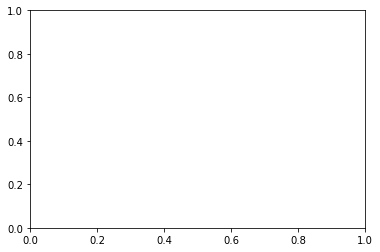

In [6]:
import pandas as pd
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), epsi,'b')
plt.ylabel('Epsilon')
plt.xlabel('Episode #')
plt.show()


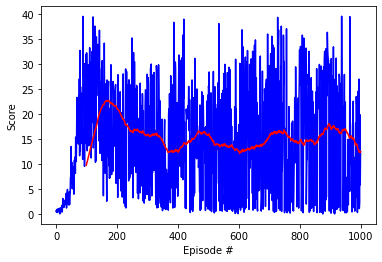

In [15]:
import pandas as pd
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores,'b')
rolling_mean = pd.Series(scores).rolling(100).mean()
plt.plot(np.arange(len(scores)), rolling_mean,'r')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
agent = Agent(state_size=37, action_size=4, seed=0, priority = True)
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)       # select an action
    env_info = env.step(action.astype(np.float32))[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))